In [1]:
import pandas as pd
import numpy as np

In [2]:
# Preprocess the data
prev_file_path = "Newsbooks_Intermediary_Data/res.csv"
prev_res = pd.read_csv(prev_file_path)
file_path = "CLUSTER_newsbooks_normalized_and_cleaned.csv"
res = pd.read_csv(file_path)

print("Columns that exist in old csv but not in new one", list(set(prev_res.columns) - set(res.columns)))
add_cols = [
    'text_name',
    'Textfile', 'Newsbooks Issue', 'Newsbooks Link', 'VID',
    'EEBO Link', 'Newsbooks Title', 'Newsbooks Date', 
    'Newsbooks Shelfmark', 'Notes', 'Ideology', 'Major/Minor'
]
prev_res['text_name'] = prev_res['text_name'].apply(lambda s: s[:4] + s[-4:])

# Merge the previous datasets' column into the new dataset
res = res.merge(prev_res[add_cols], left_on='text_name', right_on='text_name')

Columns that exist in old csv but not in new one ['Textfile', 'Newsbooks Shelfmark', 'Newsbooks Date', 'Major/Minor', 'Newsbooks Issue', 'text_key_y', 'Newsbooks Link', 'Notes', 'Newsbooks Title', 'text_key_x', 'EEBO Link', 'PCA_y', 'VID', 'PCA_x', 'Ideology', 'TSNE_y', 'TSNE_x']


In [3]:
# if we just want to look at the unnormalized dataset without merging
# we can run this code block instead
# file_path = "Newsbooks_Intermediary_Data/res.csv"
# res = pd.read_csv(file_path)

In [4]:
res = res.drop(['TSNE_x','TSNE_y','PCA_x','PCA_y'], axis=1, errors='ignore')
res

,text_name,text_key,token_csv_name,chunk_index,!UNRECOGNIZED,!UNTAGGED,!BLACKLISTED,AcademicTerms,AcademicWritingMoves,CharacterCognitiveAgency,...,Newsbooks Issue,Newsbooks Link,VID,EEBO Link,Newsbooks Title,Newsbooks Date,Newsbooks Shelfmark,Notes,Ideology,Major/Minor
0,0000.txt,0000,0000-tokens.csv,0,1.729752,10.052910,0,2.197802,0.000000,0.895401,...,NaN,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,164639.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,The perfect weekly account,2nd-9th May 1649,E.529[37],Raymond ...,Parliamentarian,major
1,0001.txt,0001,0001-tokens.csv,0,1.621844,10.264833,0,2.258263,0.000000,0.492712,...,NaN,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,164655.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,The perfect weekly account,16th-23rd May 1649,E.530[16],Raymond ...,Parliamentarian,major
2,0002.txt,0002,0002-tokens.csv,0,1.020861,9.209942,0,2.529960,0.044385,0.621394,...,NaN,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,164660.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,The perfect weekly account,23rd-30th May 1649,E.530[22],Raymond ...,Parliamentarian,major
3,0003.txt,0003,0003-tokens.csv,0,1.521217,11.289031,0,2.141713,0.040032,0.900721,...,NaN,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,164646.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,The perfect weekly account,9th-16th May 1649,E.530[7],Raymond ...,Parliamentarian,major
4,0004.txt,0004,0004-tokens.csv,0,1.379532,11.485403,0,2.053256,0.032082,1.122875,...,NaN,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,164846.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,The perfect weekly account,27th December 1649-3rd January 1650,E.536[37],Raymond ...,Parliamentarian,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0602.txt,0602,0602-tokens.csv,0,2.220577,9.869233,0,1.727116,0.074019,1.011596,...,Number 52,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,165065.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,Mercurius pragmaticus,24th April-1st May 1649,E.552[16],NaN,Royalist,major
603,0603.txt,0603,0603-tokens.csv,0,4.049924,9.449822,0,2.012226,0.000000,0.815079,...,Number 53,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,165090.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,Mercurius pragmaticus,1st-8th May 1649,E.554[17],NaN,Royalist,major
604,0604.txt,0604,0604-tokens.csv,0,2.646291,10.063362,0,1.677227,0.000000,0.782706,...,Number 1,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,165151.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,Mercurius melancholicus for King,24th-31st May 1649,E.557[8],Mcelligott ...,Royalist,NaN
605,0605.txt,0605,0605-tokens.csv,0,2.070495,10.845452,0,1.848657,0.024649,0.764111,...,Number 1,https://www.dhi.ac.uk/newsbooks/nbview?pageid=...,165134.0,http://gateway.proquest.com/openurl?ctx_ver=Z3...,Mercurius pacificus,17th-25th May 1649,E.556[16],"1 issue - Raymond "" undistinguished"" ...",NaN,NaN


In [5]:
res['Ideology'].value_counts()

Parliamentarian    349
Royalist           134
Leveler             40
Army                10
Name: Ideology, dtype: int64

In [6]:
def eda_fn(x):
    uniq_lst = pd.unique(x).tolist()
    n = len(uniq_lst)
    return n, uniq_lst

pd.set_option('display.max_rows', 100)
res_info = res.apply(lambda x: eda_fn(x)).transpose()
res_info['dtype'] = res.dtypes
res_info.reset_index(inplace=True)
res_info.columns = ['feature', 'nunique', 'unique values', 'dtype']

numerical_var_lst = res_info[
                               (res_info['feature'] != 'Ideology')
                               & (res_info['dtype'] != "object") 
                               & (res_info['nunique'] > 1)
                              ]['feature'].tolist()
print("Number of Numerical Columns are", len(numerical_var_lst))

Number of Numerical Columns are 68


In [7]:
# Scale the numerical data
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(res[numerical_var_lst])

scaled_data = scaler.transform(res[numerical_var_lst])
df_scaled = pd.DataFrame(scaled_data, columns=numerical_var_lst)

# Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_target = res['Ideology'].to_frame().apply(le.fit_transform)
res['Encoded_Ideology'] = encoded_target
target_classes = np.append(le.classes_[:-1], "NAN")

print(le.classes_)

# Fill in the NA values
df_scaled[df_scaled.isna().any(axis=1)] # there is only two rows with nan values
df_scaled = df_scaled.fillna(0)

['Army' 'Leveler' 'Parliamentarian' 'Royalist' nan]


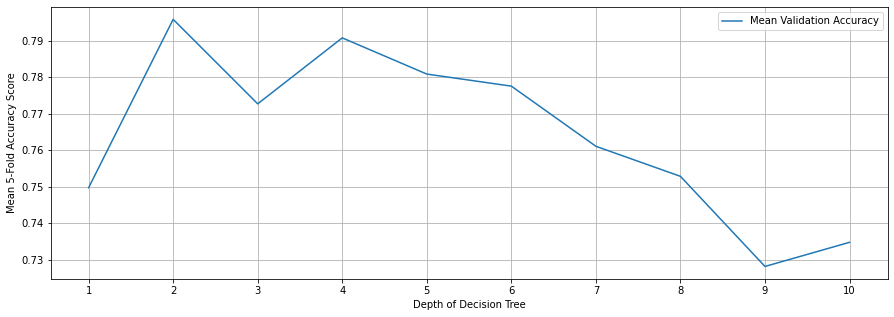

In [8]:
# Decision Tree Classifer
np.random.seed(36490) 

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
from graphviz import Source


cv = 5
d_lst = np.arange(1, 11)
mean_acc_score = []
total_acc_score_lst = []
for d in d_lst:
    clf = DecisionTreeClassifier(max_depth=d)
    clf_score = cross_val_score(clf, df_scaled, encoded_target, cv=cv, scoring="accuracy")
    clf.fit(df_scaled, encoded_target)
    total_acc = clf.score(df_scaled, encoded_target)
    mean_clf_score = np.mean(clf_score)
    mean_acc_score.append(mean_clf_score)
    total_acc_score_lst.append(total_acc)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(d_lst, mean_acc_score, label = "Mean Validation Accuracy")
# ax.plot(d_lst, total_acc_score_lst, label = "Entire Dataset Accuracy")
plt.grid(True)
ax.set_xlabel('Depth of Decision Tree')
ax.set_ylabel('Mean %d-Fold Accuracy Score' % cv)
ax.set_xticks(d_lst)
ax.set_ylim(plt.ylim())
ax.legend()

'tree.dot.pdf'

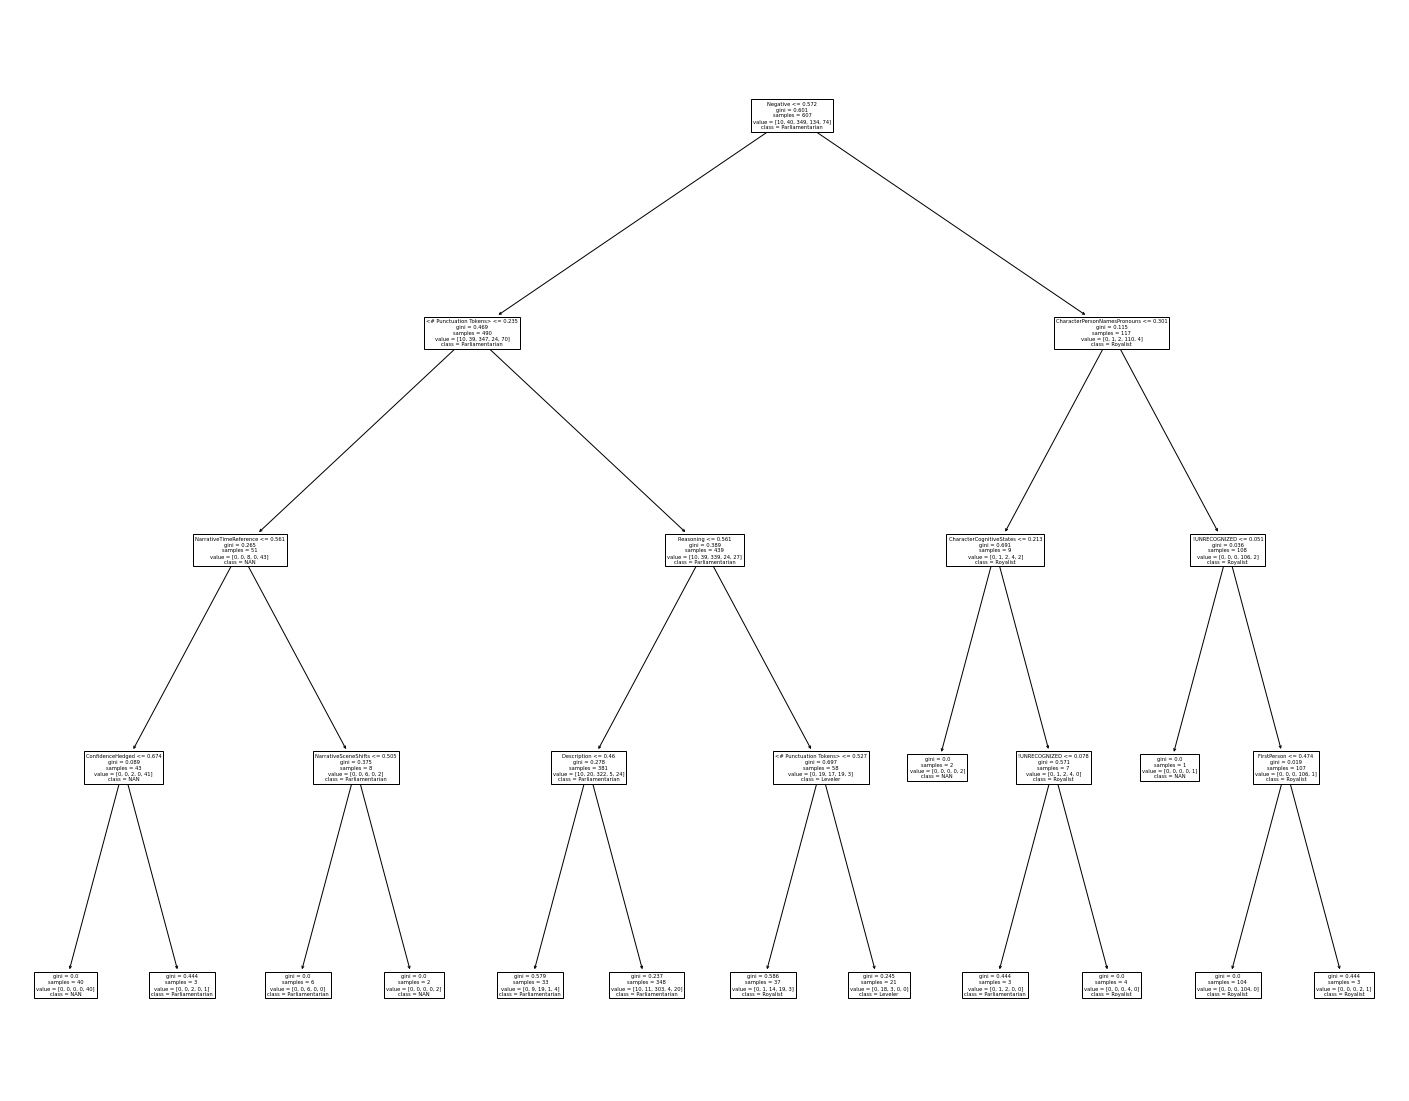

In [9]:
# max_depth = 4 from the previous plot we drew
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(df_scaled, encoded_target)

ig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=df_scaled.columns,class_names=target_classes)
plt.savefig('Decision_Tree_Depth_4.png')
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df_scaled.columns,
                                class_names=target_classes)
graph = graphviz.Source(dot_data)
graph.render("tree.dot",view = True)

In [10]:
len(clf.feature_importances_), clf.feature_importances_
import_lst = clf.feature_importances_.nonzero()[0]
import_cols = df_scaled.columns[import_lst].tolist()
n_nonzero = len(import_lst)
print("There are %d important features:" % len(import_cols), import_cols)
df_scaled.loc[:,import_cols]

There are 11 important features: ['!UNRECOGNIZED', 'CharacterCognitiveStates', 'CharacterPersonNamesPronouns', 'ConfidenceHedged', 'Description', 'FirstPerson', 'NarrativeSceneShifts', 'NarrativeTimeReference', 'Negative', 'Reasoning', '<# Punctuation Tokens>']


,!UNRECOGNIZED,CharacterCognitiveStates,CharacterPersonNamesPronouns,ConfidenceHedged,Description,FirstPerson,NarrativeSceneShifts,NarrativeTimeReference,Negative,Reasoning,<# Punctuation Tokens>
0,0.075655,0.312740,0.335005,0.864628,0.571705,0.307431,0.454804,0.189796,0.387956,0.472717,0.328844
1,0.070936,0.172092,0.439933,0.676002,0.527245,0.258454,0.439702,0.162014,0.475248,0.399973,0.342312
2,0.044650,0.217037,0.305498,0.848625,0.599388,0.055878,0.557983,0.270668,0.353577,0.357538,0.284512
3,0.066535,0.195750,0.323825,0.637827,0.475439,0.010079,0.279587,0.186681,0.460631,0.457459,0.384961
4,0.060338,0.358575,0.519034,0.306697,0.638261,0.000000,0.448129,0.437316,0.428133,0.324543,0.244669
...,...,...,...,...,...,...,...,...,...,...,...
602,0.097123,0.344707,0.322136,0.655191,0.657456,0.323041,0.321662,0.354023,0.584604,0.545407,0.281706
603,0.177134,0.427029,0.242188,0.432886,0.611158,0.256532,0.023719,0.201012,0.790813,0.534420,0.262065
604,0.115743,0.416577,0.428442,0.593847,0.494337,0.412917,0.347079,0.187179,0.761307,0.670294,0.210438
605,0.090559,0.378804,0.437253,0.602181,0.493349,0.198599,0.275439,0.106102,0.513542,0.443283,0.301347


In [11]:
import_lst_sorted_ind = np.argsort(clf.feature_importances_)[::-1][:n_nonzero]
import_lst_sorted_ind

array([54, 65, 58, 49,  0, 23,  8, 46, 18,  5, 25])

/Users/qiyunchen/miniforge3/envs/703-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '0.52'),
 Text(0, 0, '0.26'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0')]

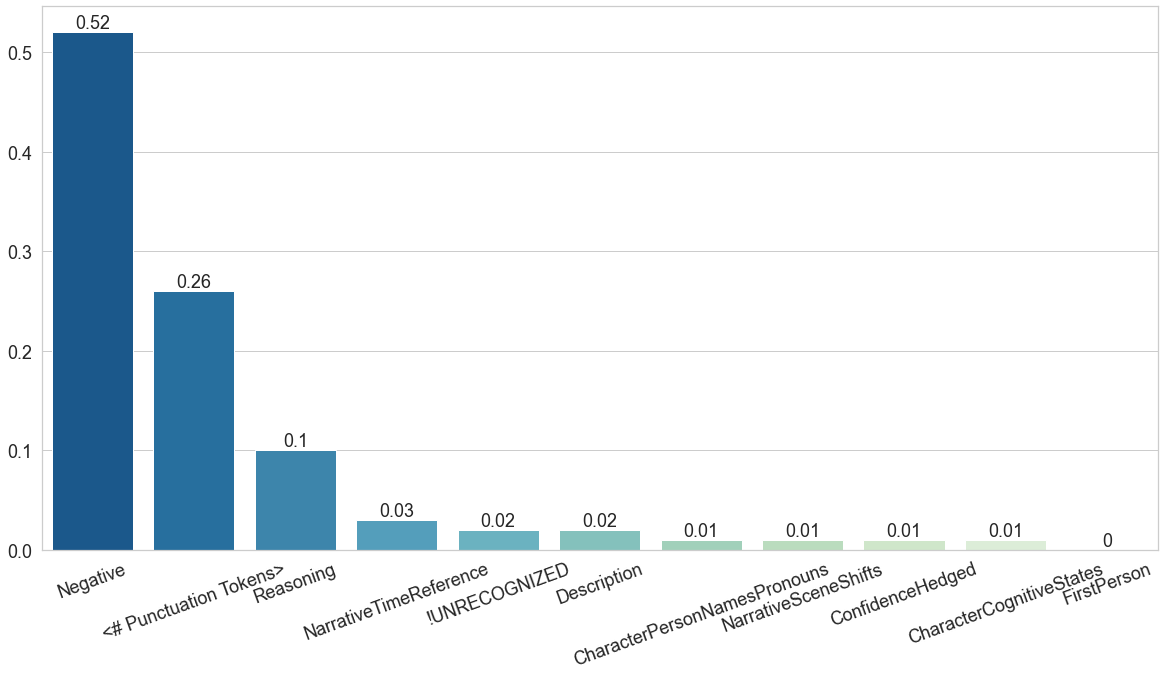

In [12]:
import seaborn as sns
fs = 18
# t is a hyperparmeter you can hand-pick for plotting the top k most important features in our model
t = 11
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("whitegrid")
x = df_scaled.columns[import_lst_sorted_ind].tolist()[:t]
y = [round(num, 2) for num in clf.feature_importances_[import_lst_sorted_ind][:t]]
sns.set_palette(reversed(sns.color_palette("GnBu", t)), t)
ax = sns.barplot(x,y)
sns.set(rc = {'figure.figsize':(20,10)})

for label in (ax.get_xticklabels() + ax.get_yticklabels()): label.set_fontsize(fs)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)


ax.bar_label(ax.containers[0], fontsize=fs)

In [13]:
print("Top %d important features and their importance scores are" % t)
names = df_scaled.columns[import_lst_sorted_ind].tolist()[:t]
scores = clf.feature_importances_[import_lst_sorted_ind][:t]
spaces_n = 30
print("\n".join((n + " " * (spaces_n-len(n)) + str(s)) for n, s in list(zip(names, scores))))

Top 11 important features and their importance scores are
Negative                      0.5232619885409558
<# Punctuation Tokens>        0.255002652246902
Reasoning                     0.10387100521253942
NarrativeTimeReference        0.028693334302435994
!UNRECOGNIZED                 0.01981850072027245
Description                   0.01947890920772712
CharacterPersonNamesPronouns  0.013983242739095382
NarrativeSceneShifts          0.012893480389025776
ConfidenceHedged              0.010661275773871442
CharacterCognitiveStates      0.009550726214093164
FirstPerson                   0.002784884653081368


In [14]:
df_scaled_all = df_scaled
info_cols = [
    'Ideology', 'text_name', 'Encoded_Ideology',
    'Newsbooks Title', 'Newsbooks Date', 'Notes']
for col in info_cols:
    df_scaled_all[col] = res[col]

In [15]:
df_scaled_all.to_csv("new_df_scaled_all.csv")